In [1]:
import pandas as pd
from EDA_Intial_Preprocessing import preprocessing
from algorithms import evaluation
from algorithms import logistic_regression
from algorithms import svm
from algorithms import naive_bayes
from algorithms import feed_forward
from algorithms import knn
from algorithms import decision_tree
from algorithms import random_forest

df = pd.read_csv('data.csv')
preprocessing_index = ['Standardised', 'Normalized', 'Unit Normalized']
algorithm_index = ['logistic_regression', 'svm', 'naive_bayes', 'feed_forward', 'K-Nearest Neighbours','decision_tree', 'random_forest']

# Returns lists of datasets that have been processed
# For each list, 0: x training data, 1: x testing data, 2: y training data and 3: y testing data
data_preprocess = preprocessing.Preprocessing(df)
data = data_preprocess.preprocess()
standardised_data = data[0]
normalized_data = data[1]
unit_normalized_data = data[2]

# Logistic Regression

In [2]:
# logistic_models = logistic_regression.get_empty_models(standardised_data, normalized_data, unit_normalized_data)
logistic_models = logistic_regression.get_empty_models()
logistic_regression_scores = evaluation.evaluate_cv(logistic_models, standardised_data, normalized_data, unit_normalized_data, 5)
# Returns a list of the scores, 0: standardised, 1: normalized, 2: unit_normalized
logistic_regression_scores

[[0.9578688949289829, 0.972614247311828, 0.994489247311828],
 [0.9296942447034752, 0.9544018817204301, 0.9918724798387096],
 [0.3981877550610461, 0.6740927419354839, 0.9528015793010752]]

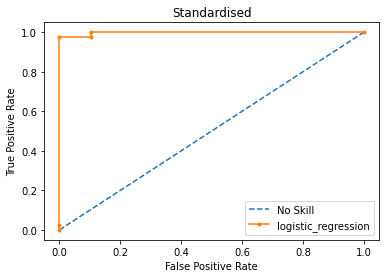

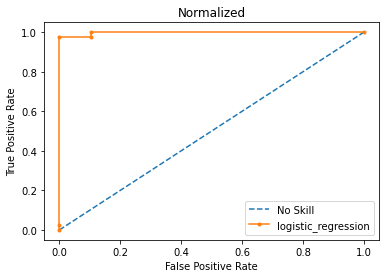

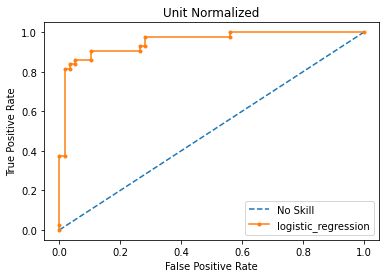

In [3]:
roc_logistic_models, roc_data = logistic_regression.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_logistic_models, roc_data, preprocessing_index, algorithm_index[0])

# SVM

In [4]:
svm_models = svm.get_empty_models()
svm_scores = evaluation.evaluate_cv(svm_models, standardised_data, normalized_data, unit_normalized_data, 5)
svm_scores

[[0.9526017458255505, 0.9641801075268817, 0.993934811827957],
 [0.948617727489031, 0.963037634408602, 0.993422379032258],
 [0.7671113048532404, 0.8600470430107526, 0.9589381720430108]]

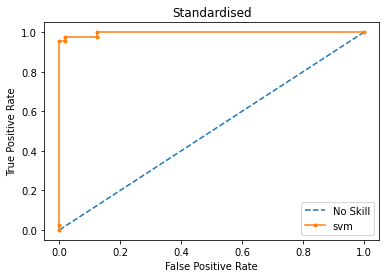

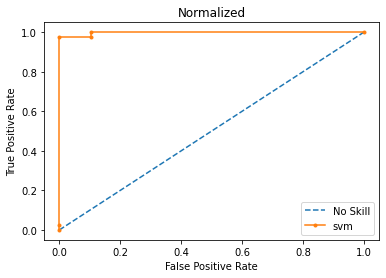

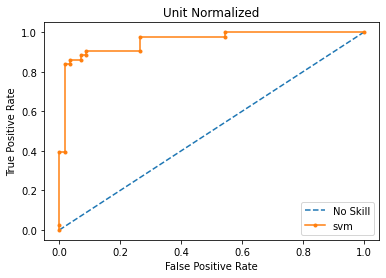

In [5]:
roc_svm_models, roc_data = svm.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_svm_models, roc_data, preprocessing_index, algorithm_index[1])

# Naive Bayes

In [6]:
gnb_models = naive_bayes.get_empty_models()
gnb_scores = evaluation.evaluate_cv(gnb_models, standardised_data, normalized_data, unit_normalized_data, 5)
gnb_scores

[[0.8945812951316094, 0.9237903225806452, 0.98487063172043],
 [0.8945812951316094, 0.9237903225806452, 0.98487063172043],
 [0.867472550731722, 0.8431451612903226, 0.952385752688172]]

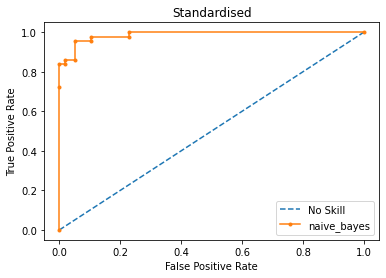

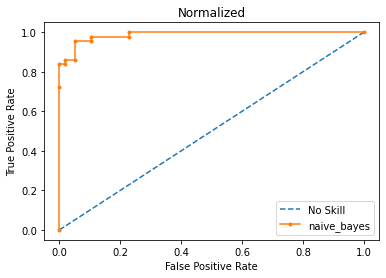

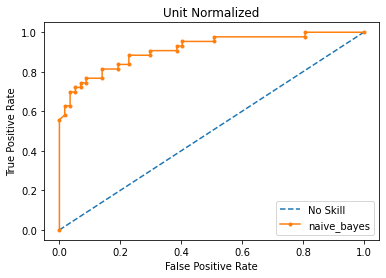

In [7]:
roc_gnb_models, roc_data = naive_bayes.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_gnb_models, roc_data, preprocessing_index, algorithm_index[2])

# Feed Forward Network

In [8]:
ff_models = feed_forward.get_empty_models()
ff_scores = evaluation.evaluate_cv(ff_models, standardised_data, normalized_data, unit_normalized_data, 5, ff=True)
ff_scores

3/3 [==============================] - 0s 1ms/step - loss: 0.0554 - tp: 31.0000 - fp: 0.0000e+00 - tn: 46.0000 - fn: 2.0000 - AUC: 1.0000


[[0.99375, 0.9947916666666666, 0.9990885496139527],
 [0.9769031781226903, 0.9822999011857708, 0.9942299246788024],
 [0.9379821481634604, 0.9332636113886114, 0.987958800792694]]

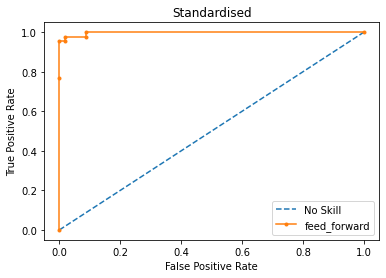

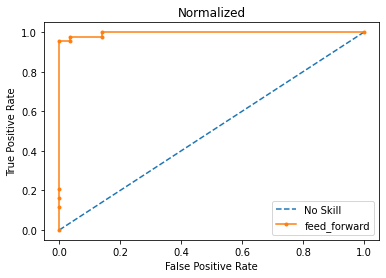

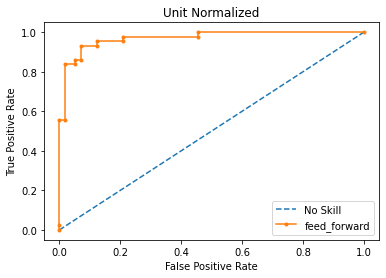

In [9]:
roc_ff_models, roc_data = feed_forward.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_ff_models, roc_data, preprocessing_index, algorithm_index[3], ff=True )

# K-Nearest Neighbours

In [10]:
knn_models = knn.get_empty_models(n_neighbors=5)
knn_scores = evaluation.evaluate_cv(knn_models, standardised_data, normalized_data, unit_normalized_data, 5)
knn_scores

[[0.9290396994427337, 0.9525201612903225, 0.9869812668010752],
 [0.9275503175834029, 0.9503360215053764, 0.985494371639785],
 [0.8875970270379032, 0.9220094086021506, 0.963661374327957]]

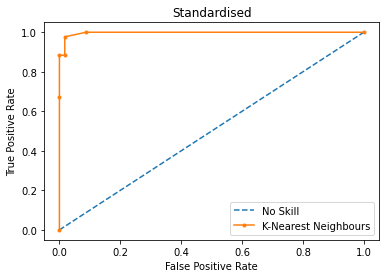

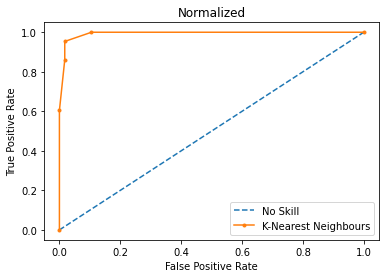

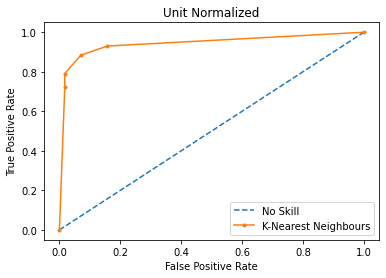

In [11]:
roc_knn_models, roc_data = knn.get_trained_models(standardised_data, normalized_data, unit_normalized_data, n_neighbors=5,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_knn_models, roc_data, preprocessing_index, algorithm_index[4])

# Decision Tree

In [12]:
tree_models = decision_tree.get_empty_models()
tree_scores = evaluation.evaluate_cv(tree_models, standardised_data, normalized_data, unit_normalized_data, 5)
tree_scores

[[0.9008559239947767, 0.9148185483870968, 0.9148185483870968],
 [0.9128368416725785, 0.9179435483870968, 0.9179435483870968],
 [0.9250234146756691, 0.938978494623656, 0.938978494623656]]

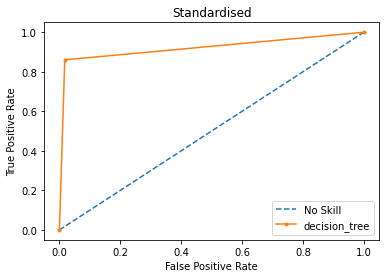

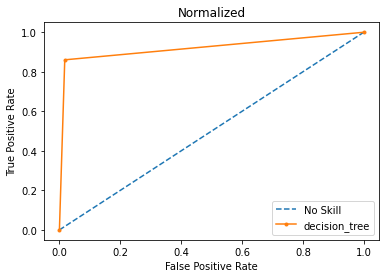

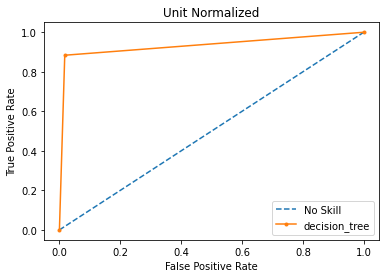

In [13]:
roc_tree_models, roc_data = decision_tree.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_tree_models, roc_data, preprocessing_index, algorithm_index[5])


# Random Forest

In [14]:
forest_models = random_forest.get_empty_models()
forest_scores = evaluation.evaluate_cv(forest_models, standardised_data, normalized_data, unit_normalized_data, 5)
forest_scores

[[0.9062479440965163, 0.9322244623655914, 0.9873046875],
 [0.9062479440965163, 0.9322244623655914, 0.9867670530913978],
 [0.8857713865337278, 0.9197244623655914, 0.9795320900537634]]

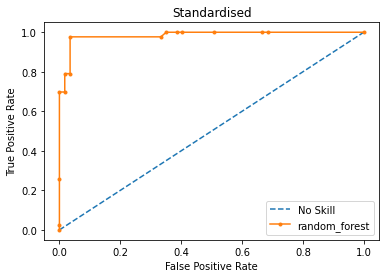

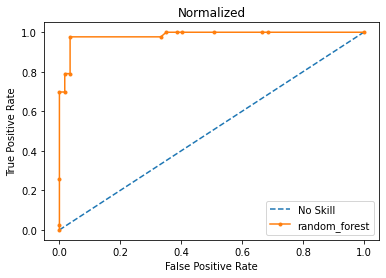

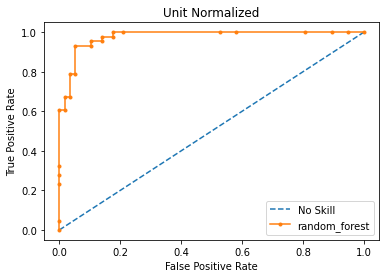

In [15]:
roc_forest_models, roc_data = random_forest.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)

evaluation.graph_roc_curve(roc_forest_models, roc_data, preprocessing_index, algorithm_index[6])


## Further Information

### The algorithm was trained on the Wisconsin Breast Cancer Dataset. This is available from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data